## **Proyecto 3 - Productos bancarios**
**Analítica Computacional para la toma de Decisiones**

Grupo: 
1.	Nicolay Esteban Barrera Bayona – 201731399
2.	Daniel Sebastian Caro Ochoa – 202117080


**Roles**
- Nicolay Barrera: Ingeniería de datos, Análisis de datos y Análisis de negocio
- Daniel Caro: Ciencia de datos, Tablero de datos y Despliegue

### **1. Carga y exploración de datos**


***


In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

# Cargar el archivo CSV
data = pd.read_csv('db_final.csv', sep=',')

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Información general sobre el dataset (tipos de datos y valores nulos)
print("\nInformación general del dataset:")
data.info()

# Descripción estadística de las columnas numéricas
print("\nDescripción estadística de las columnas numéricas:")
print(data.describe())

# Verificar valores nulos en cada columna
print("\nCantidad de valores nulos por columna:")
print(data.isnull().sum())

# Identificar columnas numéricas y de texto
caracteristicas_numericas = data.select_dtypes(include=[np.number]).columns.to_list()
caracteristicas_texto = data.select_dtypes(include=[object]).columns.to_list()

print("\nCaracterísticas numéricas:\n", caracteristicas_numericas)
print("\nCaracterísticas de texto:\n", caracteristicas_texto)

# Mostrar un análisis de los valores únicos en las columnas de texto
print("\nValores únicos en columnas de texto:")
for col in caracteristicas_texto:
    print(f"{col}: {data[col].nunique()} valores únicos")

# Mostrar los datos faltantes en porcentajes
print("\nPorcentaje de datos faltantes por columna:")
print((data.isnull().sum() / len(data)) * 100)


Primeras filas del dataset:
   periodo estu_tipodocumento  estu_consecutivo cole_area_ubicacion  \
0    20194                 CC  SB11201940541523              URBANO   
1    20194                 CC  SB11201940541523              URBANO   
2    20172                 TI  SB11201720542411              URBANO   
3    20142                 TI  SB11201420256598              URBANO   
4    20194                 TI  SB11201940170160              URBANO   

  cole_bilingue cole_calendario cole_caracter  cole_cod_dane_establecimiento  \
0           NaN               A     ACADÉMICO                   3.110011e+11   
1           NaN               A     ACADÉMICO                   3.110011e+11   
2             N               A     ACADÉMICO                   3.110010e+11   
3             N               A     ACADÉMICO                   1.110010e+11   
4             N               A     ACADÉMICO                   3.110010e+11   

  cole_depto_ubicacion cole_genero  ... fami_tienecomputador  \


In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

# Cargar el archivo CSV
data = pd.read_csv('db_final.csv', sep=',')

# Verificar duplicados
duplicados = data.duplicated().sum()
print(f"Duplicados encontrados: {duplicados}")

#Quitar filas duplicadas 
data = data.drop_duplicates()

# Verificar tipos de datos
print("\nTipos de datos incorrectos:")
for columna in data.columns:
    if data[columna].dtype == 'object':
        try:
            data[columna].astype(float)
        except:
            print(f"La columna '{columna}' tiene valores no numéricos.")


# Convertir la columna de fechas al formato datetime
data['estu_fechanacimiento'] = pd.to_datetime(data['estu_fechanacimiento'], errors='coerce')

# Eliminar las columnas que no son relevantes para el modelo
columns_to_drop = [
    'estu_consecutivo', 'estu_tipodocumento', 
    'cole_cod_dane_establecimiento', 'cole_nombre_establecimiento', 
    'cole_nombre_sede', 'cole_sede_principal', 'cole_mcpio_ubicacion',
    'estu_estadoinvestigacion', 'estu_nacionalidad', 'estu_pais_reside'
]

# Eliminar las columnas del DataFrame
data = data.drop(columns=columns_to_drop)

# Identificar columnas numéricas y de texto
caracteristicas_numericas = data.select_dtypes(include=[np.number]).columns.to_list()
caracteristicas_texto = data.select_dtypes(include=[object]).columns.to_list()

# Revisar las categorías únicas y frecuencia de cada variable categórica
for col in caracteristicas_texto:
    print(f"\nCategorías únicas en '{col}': {data[col].unique()}")
    print(data[col].value_counts())

profile = ProfileReport(data, title = "Reporte de Datos")
profile.to_notebook_iframe()

Duplicados encontrados: 162460

Tipos de datos incorrectos:
La columna 'estu_tipodocumento' tiene valores no numéricos.
La columna 'estu_consecutivo' tiene valores no numéricos.
La columna 'cole_area_ubicacion' tiene valores no numéricos.
La columna 'cole_bilingue' tiene valores no numéricos.
La columna 'cole_calendario' tiene valores no numéricos.
La columna 'cole_caracter' tiene valores no numéricos.
La columna 'cole_depto_ubicacion' tiene valores no numéricos.
La columna 'cole_genero' tiene valores no numéricos.
La columna 'cole_jornada' tiene valores no numéricos.
La columna 'cole_mcpio_ubicacion' tiene valores no numéricos.
La columna 'cole_naturaleza' tiene valores no numéricos.
La columna 'cole_nombre_establecimiento' tiene valores no numéricos.
La columna 'cole_nombre_sede' tiene valores no numéricos.
La columna 'cole_sede_principal' tiene valores no numéricos.
La columna 'estu_depto_presentacion' tiene valores no numéricos.
La columna 'estu_depto_reside' tiene valores no numér

C:\Users\danis\AppData\Local\Temp\ipykernel_3784\3192844182.py:26: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['estu_fechanacimiento'] = pd.to_datetime(data['estu_fechanacimiento'], errors='coerce')



Categorías únicas en 'cole_area_ubicacion': ['URBANO' 'RURAL']
cole_area_ubicacion
URBANO    545156
RURAL       5045
Name: count, dtype: int64

Categorías únicas en 'cole_bilingue': [nan 'N' 'S']
cole_bilingue
N    453168
S     15545
Name: count, dtype: int64

Categorías únicas en 'cole_calendario': ['A' 'OTRO' 'B']
cole_calendario
A       523972
B        20051
OTRO      6178
Name: count, dtype: int64

Categorías únicas en 'cole_caracter': ['ACADÉMICO' 'TÉCNICO/ACADÉMICO' nan 'TÉCNICO' 'NO APLICA']
cole_caracter
ACADÉMICO            467336
TÉCNICO/ACADÉMICO     57686
TÉCNICO                9974
NO APLICA              2487
Name: count, dtype: int64

Categorías únicas en 'cole_depto_ubicacion': ['BOGOTÁ']
cole_depto_ubicacion
BOGOTÁ    550201
Name: count, dtype: int64

Categorías únicas en 'cole_genero': ['MIXTO' 'FEMENINO' 'MASCULINO']
cole_genero
MIXTO        510690
FEMENINO      25527
MASCULINO     13984
Name: count, dtype: int64

Categorías únicas en 'cole_jornada': ['SABATINA' 'COM

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
# Verificar los resultados finales
print("Transformaciones completadas. Vista previa del dataset:")
print(data.head())

Transformaciones completadas. Vista previa del dataset:
   periodo cole_area_ubicacion cole_bilingue cole_calendario cole_caracter  \
0    20194              URBANO           NaN               A     ACADÉMICO   
2    20172              URBANO             N               A     ACADÉMICO   
3    20142              URBANO             N               A     ACADÉMICO   
4    20194              URBANO             N               A     ACADÉMICO   
6    20162              URBANO             N               A     ACADÉMICO   

  cole_depto_ubicacion cole_genero cole_jornada cole_naturaleza  \
0               BOGOTÁ       MIXTO     SABATINA      NO OFICIAL   
2               BOGOTÁ       MIXTO     COMPLETA      NO OFICIAL   
3               BOGOTÁ       MIXTO        TARDE         OFICIAL   
4               BOGOTÁ       MIXTO     COMPLETA      NO OFICIAL   
6               BOGOTÁ       MIXTO     COMPLETA      NO OFICIAL   

  estu_depto_presentacion  ... fami_tienecomputador fami_tieneinternet  

### **4. Modelamiento**

### **Modelo 1: Variables de ínteres de los colegios**

#### **Definir los datos de entrenamiento y prueba**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import mlflow
import mlflow.keras

# Variables relacionadas con ubicación y características del colegio
selected_columns = [
    'cole_area_ubicacion', 
    'cole_bilingue', 
    'cole_calendario', 
    'cole_caracter', 
    'cole_genero', 
    'cole_jornada', 
    'cole_naturaleza', 
    'punt_global'  # Variable objetivo
]

# Filtrar la base de datos
filtered_data = data[selected_columns]

# Manejo de valores nulos
filtered_data.dropna(inplace=True)

# Separar características y variable objetivo
X = filtered_data.drop('punt_global', axis=1)
y = filtered_data['punt_global']

# Preprocesamiento de datos: codificar categóricas y escalar numéricas
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Construir el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

C:\Users\danis\AppData\Local\Temp\ipykernel_3784\114220755.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(inplace=True)


In [3]:
print(y.mean)

<bound method Series.mean of 2         346.0
3         261.0
4         218.0
6         353.0
7         247.0
          ...  
712656    372.0
712657    284.0
712658    233.0
712659    315.0
712660    190.0
Name: punt_global, Length: 467694, dtype: float64>


#### **Definir la Arquitectura y entrenar el Modelo:**

In [4]:
# Crear y entrenar el modelo de red neuronal
with mlflow.start_run():
    # Definir la arquitectura de la red neuronal
    model = Sequential([
        Dense(128, input_dim=X_train_transformed.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')  # Predicción continua
    ])
    
    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    
    # Entrenar el modelo
    history = model.fit(X_train_transformed, y_train, 
                        validation_data=(X_test_transformed, y_test),
                        epochs=50, batch_size=32, verbose=1)
    
    # Evaluar el modelo
    loss, mae = model.evaluate(X_test_transformed, y_test, verbose=0)
    print(f"Mean Absolute Error: {mae}")
    
    # Registrar con MLflow
    mlflow.log_param("input_features", list(X.columns))
    mlflow.log_param("epochs", 50)
    mlflow.log_param("batch_size", 32)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("loss", loss)
    mlflow.keras.log_model(model, "model")

    print("Modelo registrado en MLflow.")

c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11693/11693 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 5545.8560 - mae: 51.2969 - val_loss: 1727.1208 - val_mae: 33.3468
Epoch 2/50
11693/11693 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 2178.5559 - mae: 37.3121 - val_loss: 1729.1292 - val_mae: 33.3762
Epoch 3/50
11693/11693 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 1896.0763 - mae: 34.8931 - val_loss: 1720.4291 - val_mae: 33.2835
Epoch 4/50
11693/11693 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 1761.8672 - mae: 33.6735 - val_loss: 1727.5054 - val_mae: 33.3551
Epoch 5/50
11693/11693 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 1754.5830 - mae: 33.5865 - val_loss: 1720.0930 - val_mae: 33.2933
Epoch 6/50
11693/11693 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 1752.6270 - mae: 33.5950 - val_loss: 1726.9971 - val_mae: 33.3543
Epoch 7/50
11693/11693 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 1745.4989 - mae: 33.5224 - val_loss: 1742.6013 - val_mae: 33.4600
Epoch 8/50
11693/11693 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 1748.5272 - mae: 3

2024/12/03 18:47:06 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 18:47:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo registrado en MLflow.


In [ ]:
# Guardar el modelo entrenado
model.save('modelo_colegios.h5')

from joblib import dump

# Guardar el pipeline
dump(pipeline, 'pipeline_preprocessor.joblib')

['pipeline_preprocessor.joblib']

#### **Visualización del Proceso de Entrenamiento:**

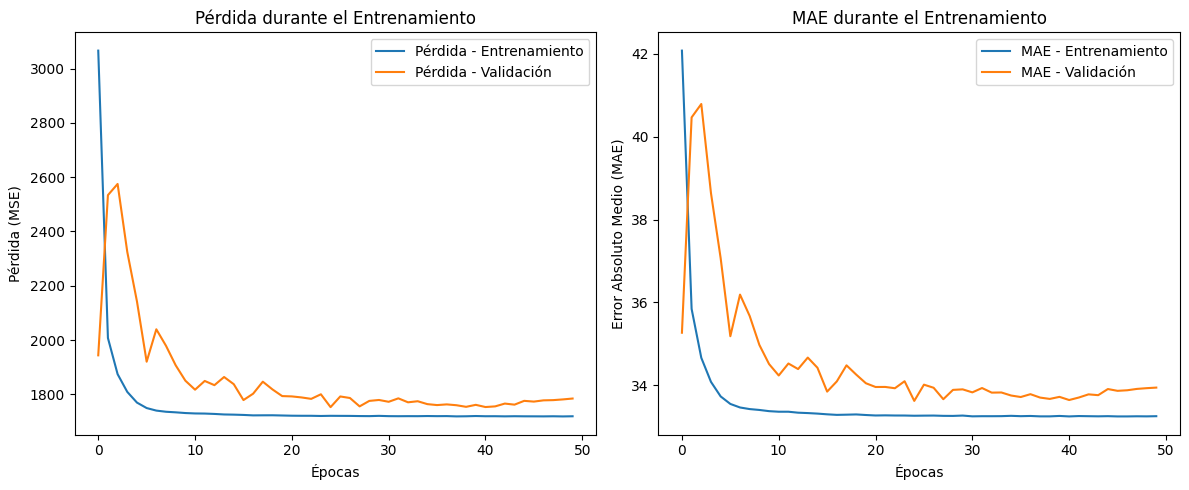

In [ ]:
import matplotlib.pyplot as plt

# Graficar la pérdida (loss) para entrenamiento y validación
plt.figure(figsize=(12, 5))

# Gráfica de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida - Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida - Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()

# Gráfica de MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE - Entrenamiento')
plt.plot(history.history['val_mae'], label='MAE - Validación')
plt.title('MAE durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error Absoluto Medio (MAE)')
plt.legend()

plt.tight_layout()
plt.show()


### **Modelo 2: Regresión Múltiple**

#### **Definir los datos de entrenamiento y prueba** 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import mlflow
import mlflow.keras
import matplotlib.pyplot as plt

# Selección de columnas relevantes
selected_columns = [
    "estu_fechanacimiento", "estu_genero",
    "fami_cuartoshogar", "fami_educacionmadre", "fami_educacionpadre",
    "fami_estratovivienda", "fami_personashogar", "fami_tieneautomovil",
    "fami_tienecomputador", "fami_tieneinternet", "fami_tienelavadora",
    "punt_global"
]
data = data[selected_columns]

# Variables categóricas (sin incluir edad)
categorical_features = [
    "estu_genero", "fami_cuartoshogar", "fami_educacionmadre",
    "fami_educacionpadre", "fami_estratovivienda", "fami_personashogar",
    "fami_tieneautomovil", "fami_tienecomputador", "fami_tieneinternet",
    "fami_tienelavadora"
]

# Crear preprocesador (sin la columna de edad)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_features)
    ]
)

# Preprocesamiento de datos
def preprocess_data(df):
    # Convertir fecha de nacimiento a edad (pero no incluirla en el modelo)
    df['estu_fechanacimiento'] = pd.to_datetime(df['estu_fechanacimiento'], errors='coerce')
    # No calculamos la edad porque no la necesitamos en el modelo
    df.drop(columns=['estu_fechanacimiento'], inplace=True)

    # Dividir X e y
    X = df.drop(columns=['punt_global'])
    y = df['punt_global']
    return X, y

# Preprocesar los datos
X, y = preprocess_data(data)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el preprocesador con los datos de entrenamiento
preprocessor.fit(X_train)

# Guardar el preprocesador ajustado
from joblib import dump
dump(preprocessor, 'preprocessor.pkl')

# Transformar los conjuntos de datos
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)



C:\Users\danis\AppData\Local\Temp\ipykernel_3784\1296229951.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['estu_fechanacimiento'] = pd.to_datetime(df['estu_fechanacimiento'], errors='coerce')
C:\Users\danis\AppData\Local\Temp\ipykernel_3784\1296229951.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['estu_fechanacimiento'], inplace=True)


In [5]:
print(y.mean)

<bound method Series.mean of 0         176.0
2         346.0
3         261.0
4         218.0
6         353.0
          ...  
712656    372.0
712657    284.0
712658    233.0
712659    315.0
712660    190.0
Name: punt_global, Length: 550201, dtype: float64>


#### **Definir la Arquitectura del Modelo de Red Neuronal:**

In [20]:
# Modelo de red neuronal
with mlflow.start_run():
    # Definir arquitectura del modelo
    model = Sequential([
        Dense(128, input_dim=X_train_transformed.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])

    # Compilar modelo
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    # Entrenar el modelo
    history = model.fit(
        X_train_transformed, y_train,
        validation_data=(X_test_transformed, y_test),
        epochs=50, batch_size=32, verbose=1
    )

    # Evaluar el modelo
    loss, mae = model.evaluate(X_test_transformed, y_test, verbose=0)
    print(f"Mean Absolute Error: {mae}")

    # Registrar en MLflow
    mlflow.log_param("input_features", categorical_features)
    mlflow.log_param("epochs", 50)
    mlflow.log_param("batch_size", 32)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("loss", loss)
    mlflow.keras.log_model(model, "model")


# Guardar el modelo
model.save('modelo_estudiantes.h5')


c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
13755/13755 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 4732.2773 - mae: 48.4076 - val_loss: 1768.8721 - val_mae: 33.7167
Epoch 2/50
13755/13755 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 2052.1267 - mae: 36.1865 - val_loss: 2459.9177 - val_mae: 39.9571
Epoch 3/50
13755/13755 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 1778.2827 - mae: 33.7479 - val_loss: 2155.3918 - val_mae: 37.2781
Epoch 4/50
13755/13755 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 1708.8759 - mae: 33.1096 - val_loss: 2137.5247 - val_mae: 37.1116
Epoch 5/50
13755/13755 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 1686.6532 - mae: 32.8975 - val_loss: 2002.3435 - val_mae: 35.9367
Epoch 6/50
13755/13755 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 1674.9741 - mae: 32.7960 - val_loss: 1810.1117 - val_mae: 34.1445
Epoch 7/50
13755/13755 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1675.0424 - mae: 32.7758 - val_loss: 1924.8472 - val_mae: 35.2381
Epoch 8/50
13755/13755 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1670.6908 - mae: 3

2024/12/05 00:51:33 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


Mean Absolute Error: 33.462284088134766


2024/12/05 00:51:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


#### **4.4 Visualización del Proceso de Entrenamiento:**

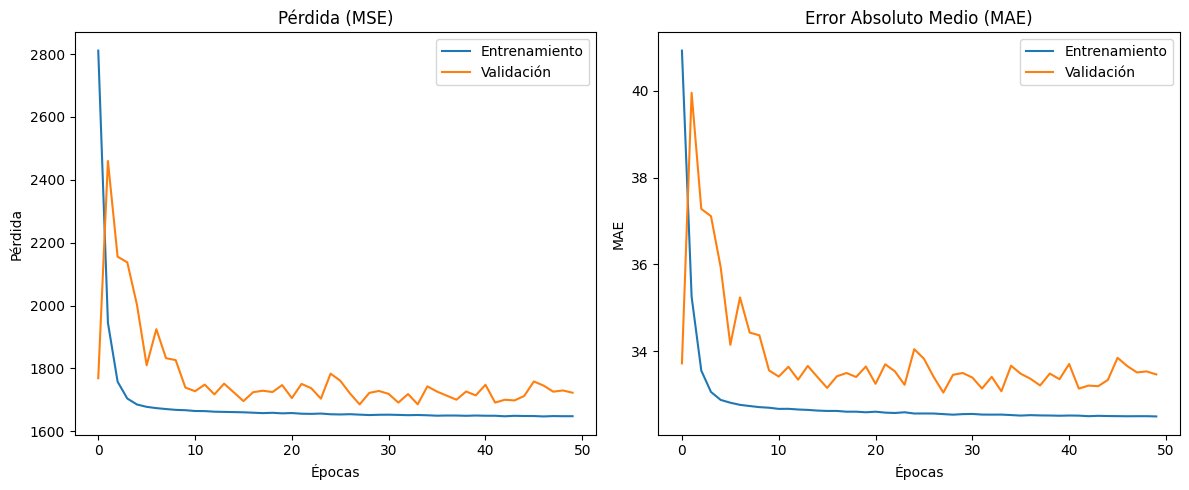

In [21]:
%matplotlib inline
# Graficar métricas de entrenamiento
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida (MSE)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Entrenamiento')
plt.plot(history.history['val_mae'], label='Validación')
plt.title('Error Absoluto Medio (MAE)')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()
